In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e14/sample_submission.csv
/kaggle/input/playground-series-s3e14/train.csv
/kaggle/input/playground-series-s3e14/test.csv


In [2]:
# reading train and test into pd files. 

X_train = pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv', index_col='id')
X_test = pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv', index_col='id')

In [3]:
#  separate target from predictors
#y = X_train['yield']              
#X_train.drop(['yield'], axis=1, inplace=True)

In [4]:
X_train.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [5]:
X_train.dtypes, X_train.shape

(clonesize               float64
 honeybee                float64
 bumbles                 float64
 andrena                 float64
 osmia                   float64
 MaxOfUpperTRange        float64
 MinOfUpperTRange        float64
 AverageOfUpperTRange    float64
 MaxOfLowerTRange        float64
 MinOfLowerTRange        float64
 AverageOfLowerTRange    float64
 RainingDays             float64
 AverageRainingDays      float64
 fruitset                float64
 fruitmass               float64
 seeds                   float64
 yield                   float64
 dtype: object,
 (15289, 17))

In [6]:
# check to see if there are any NaN values in datatable. 
X_train.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


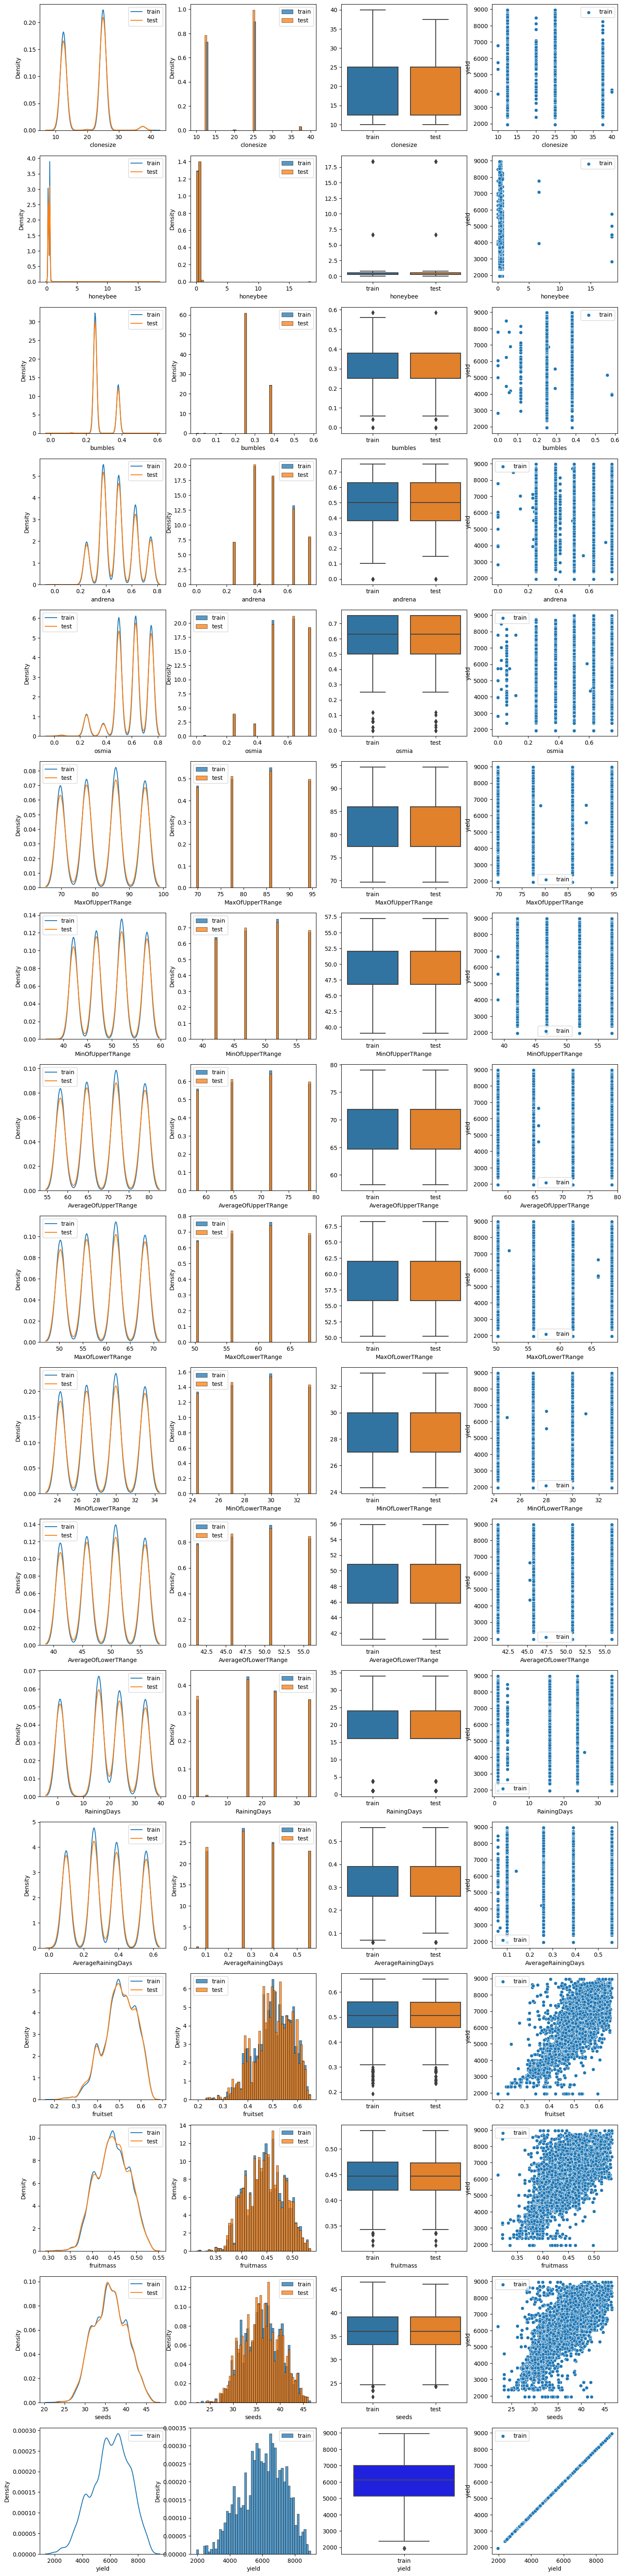

In [7]:
# Lets go with EDA for this time around. 
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=len(X_train.select_dtypes(include='number').columns), ncols = 4, figsize=(18,80))
axes = axes.flatten()

i = 0 
for col in X_train.select_dtypes(include='number').columns:
    sns.kdeplot(X_train[col], label= 'train', ax = axes[i], fill=False)
    sns.histplot(X_train[col], label='train', ax=axes[i+1], stat='density', bins=50)
    
    if col != 'yield':
        sns.kdeplot(X_test[col], label='test', ax=axes[i], fill=False)
        sns.histplot(X_test[col], label='test', ax=axes[i+1], stat='density', bins=50)
        
    if col != 'yield':
        tmp_data = pd.DataFrame({"train": X_train[col], "test": X_test[col]})
        sns.boxplot(data=tmp_data, ax=axes[i + 2])
    else:
        tmp_data = pd.DataFrame({"train": X_train[col]})
        custom_palette = ["blue"]
        sns.boxplot(data=tmp_data, ax=axes[i + 2], palette=custom_palette)
    axes[i + 2].set_xlabel(col)

    sns.scatterplot(x=col, y = 'yield', label='train', ax=axes[i + 3], data=X_train)

    axes[i].legend()
    axes[i + 1].legend()
    axes[i + 3].legend()
    i += 4

plt.show()

# Looks like there are two types of data distributions here. 
 Discrete - AverageRainingdays, clonesize, honeybee, bumbles, andrena, osmia, MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, AverageOfLowerTRange, RainingDays, AverageRainingDays \
 Gaussian/bell shaped - yield, seeds, fruitmass, fruitset.

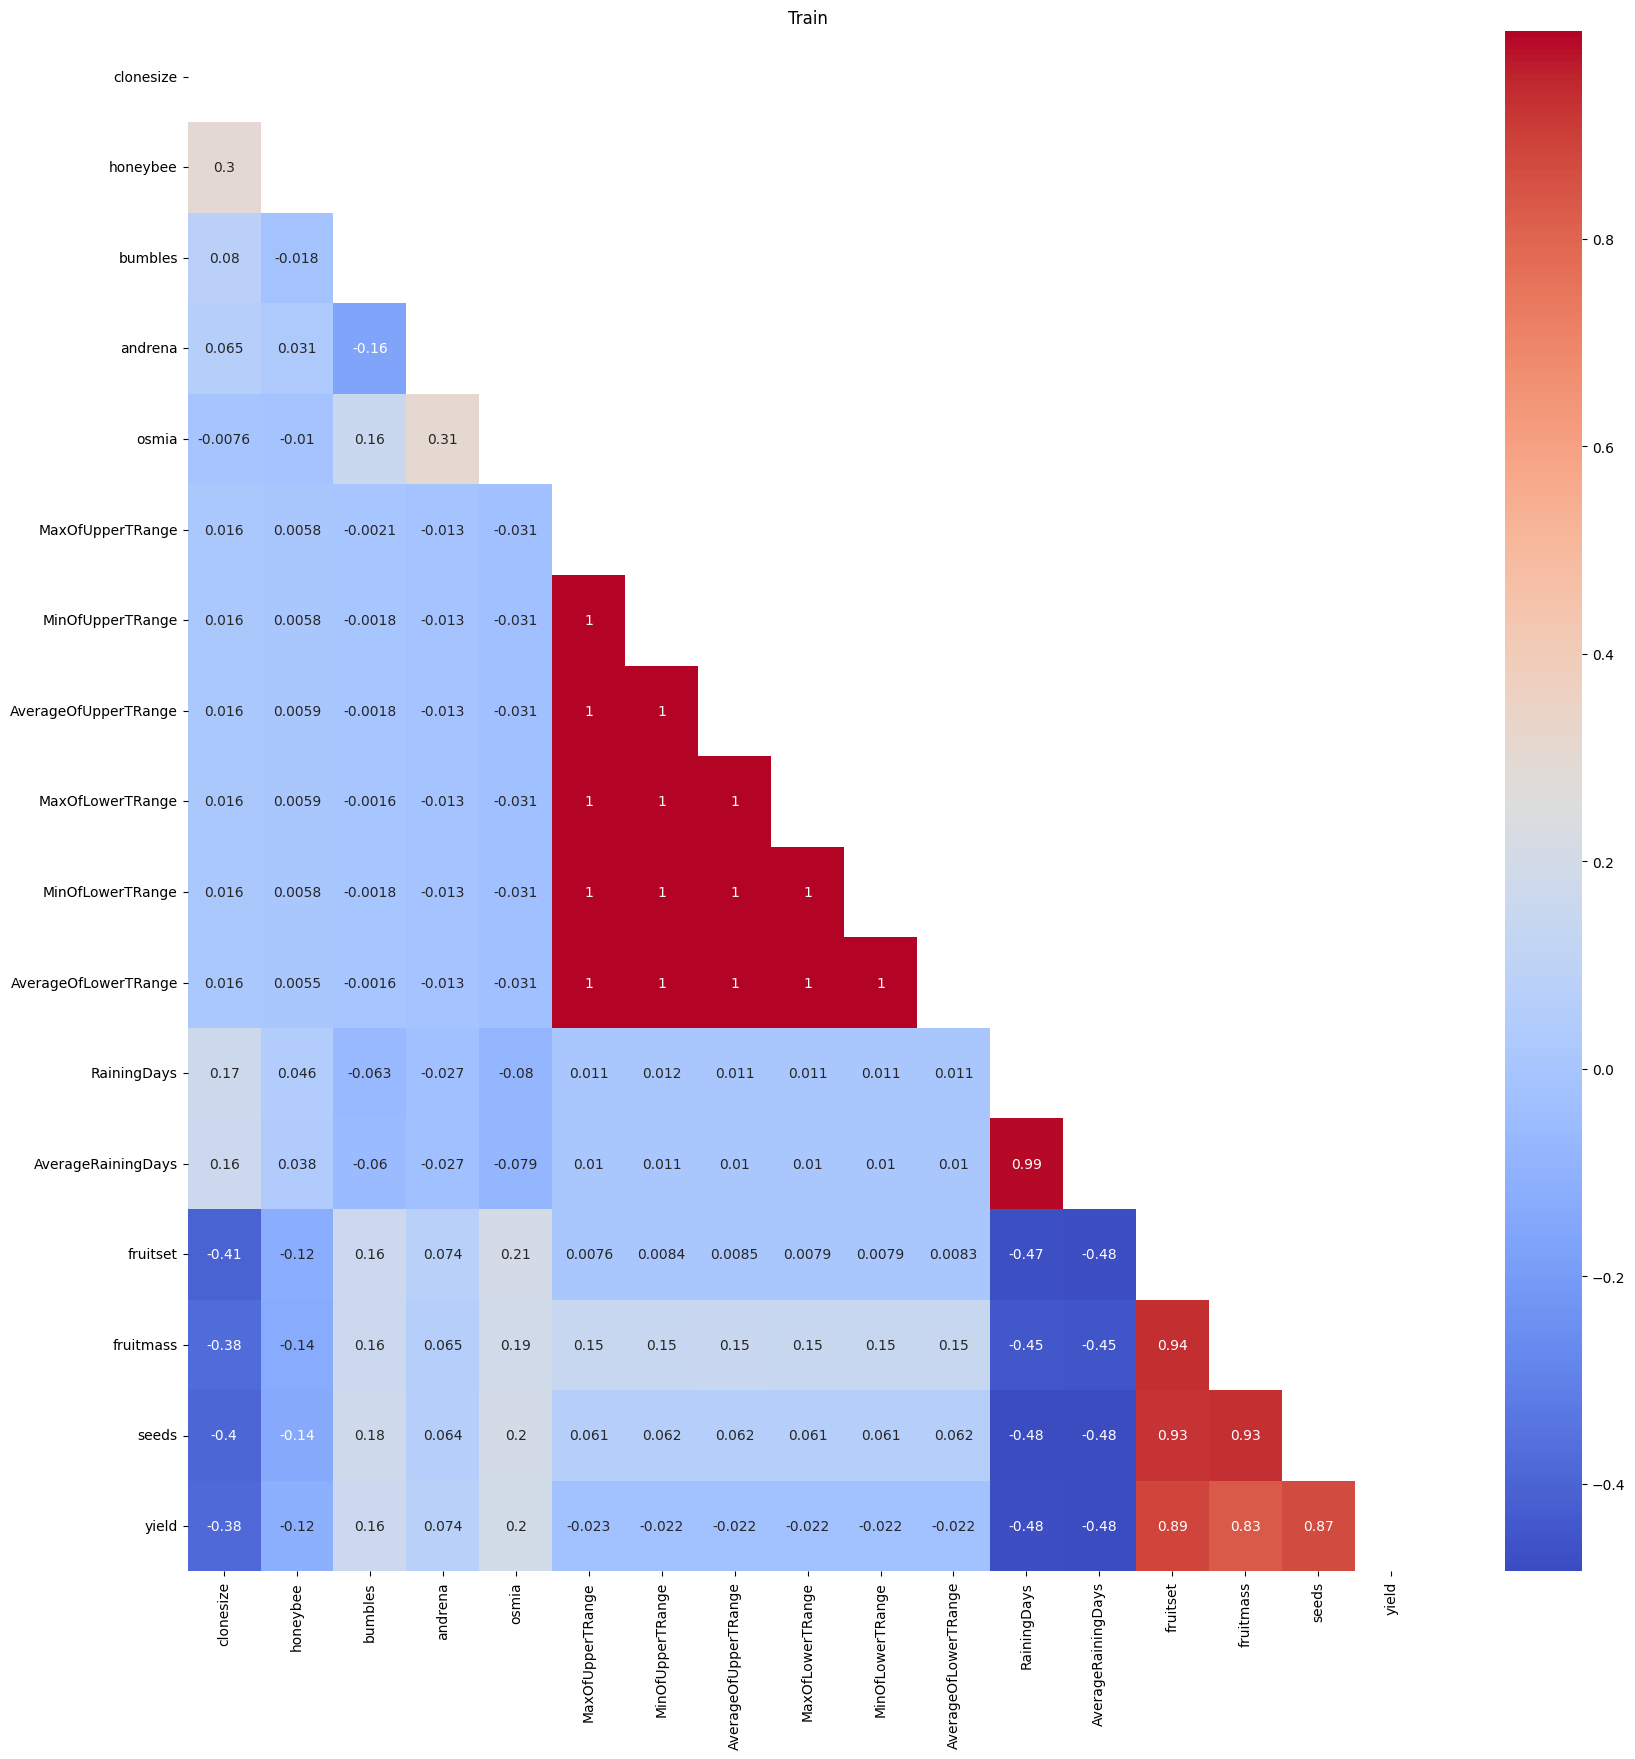

In [8]:
# Now, for these all data types, lets calculate the correlation checks. Lets build function to show correlations. 

def show_feature_corr(df: pd.DataFrame, title:str):
    plt.figure(figsize=(20,20))
    corr_matrix = df.corr()
    
    # We do not want upper triangle, so lets mask it out. 
    
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True 
    
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, mask = mask)
    plt.title(title)
    plt.show()
    
show_feature_corr(X_train, 'Train')

In [9]:
# As all of these Trange cols have same coorelation, we should only keep 1 of them and reject rest. 

# Keep - clonesize, honeybee, bumbles, AverageRainingdays, AverageOfLowerTRange, andrena, osmia,

# features to remove - ,  MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, , fruitset, fruitmass, seeds.

In [10]:
# Lets keep 'MaxOfUpperTRange' as 1 rep. keep avg rainingdays, remove fruitmass

In [11]:
features_to_remove = [ 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange',  'fruitmass', 'RainingDays', 'MaxOfUpperTRange']

In [12]:
z = X_train.drop(features_to_remove, axis=1)
y = z['yield']              
z.drop(['yield'], axis=1, inplace=True)
z.head()

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfLowerTRange,AverageRainingDays,fruitset,seeds
id,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,41.2,0.39,0.425011,32.460887
1,25.0,0.50,0.25,0.50,0.50,41.2,0.39,0.444908,33.858317
2,12.5,0.25,0.25,0.63,0.63,50.8,0.39,0.552927,38.341781
3,12.5,0.25,0.25,0.63,0.50,45.8,0.39,0.565976,39.467561
4,25.0,0.50,0.25,0.63,0.63,45.8,0.39,0.579677,40.484512


In [13]:
# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train_f, X_valid, y_train_f, y_valid = train_test_split(z, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [14]:
# As all numeric, no need to convert to one-hot. 
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Define the model
my_model_1 = XGBRegressor(random_state=0) 

# Fit the model
my_model_1.fit(X_train_f, y_train_f)

# Check your answer
predictions_1 = my_model_1.predict(X_valid) 

# Calculate MAE
mae_1 = mean_absolute_error(predictions_1, y_valid)
print("Mean Absolute Error:" , mae_1)

Mean Absolute Error: 371.97629102551196


In [15]:
testing = [1, 10, 100, 1000]
lr = [0.5, 0.1, 0.05, 0.01, 0.001]
for t in testing:
    for i in lr:
        my_model_3 = XGBRegressor(n_estimators=t, learning_rate=i, n_jobs=4) 

        # Fit the model
        my_model_3.fit(X_train_f, y_train_f) # Your code here

        # Get predictions
        predictions_3 = my_model_3.predict(X_valid)

        # Calculate MAE
        mae_3 = mean_absolute_error(predictions_3, y_valid)

        # Uncomment to print MAE
        print(f'Mean Absolute Error for learning rate {i} and estimators {t}:' , mae_3)

Mean Absolute Error for learning rate 0.5 and estimators 1: 3007.6803225918698
Mean Absolute Error for learning rate 0.1 and estimators 1: 5409.9235288066675
Mean Absolute Error for learning rate 0.05 and estimators 1: 5710.511511179004
Mean Absolute Error for learning rate 0.01 and estimators 1: 5950.981899309558
Mean Absolute Error for learning rate 0.001 and estimators 1: 6005.087733609347
Mean Absolute Error for learning rate 0.5 and estimators 10: 359.0210709405402
Mean Absolute Error for learning rate 0.1 and estimators 10: 2099.321303638765
Mean Absolute Error for learning rate 0.05 and estimators 10: 3598.980320690569
Mean Absolute Error for learning rate 0.01 and estimators 10: 5436.23806143904
Mean Absolute Error for learning rate 0.001 and estimators 10: 5951.251451315851
Mean Absolute Error for learning rate 0.5 and estimators 100: 393.16263955232694
Mean Absolute Error for learning rate 0.1 and estimators 100: 356.8154004409796
Mean Absolute Error for learning rate 0.05 an

In [16]:
my_model_4 = XGBRegressor(n_estimators=100, learning_rate=0.05, n_jobs=4) 


# Fit the model
my_model_4.fit(X_train_f, y_train_f) # Your code here

# Get predictions
predictions_4 = my_model_4.predict(X_valid)

# Calculate MAE
mae_4 = mean_absolute_error(predictions_4, y_valid)

# Uncomment to print MAE
print(f'Mean Absolute Error:' , mae_4)


Mean Absolute Error: 354.30437897172885


In [17]:
z_test = X_test.drop(features_to_remove, axis=1)
#y_test = z_test['yield']              
#z_test.drop(['yield'], axis=1, inplace=True)
z_test.head()

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfLowerTRange,AverageRainingDays,fruitset,seeds
id,,,,,,,,,
15289,25.0,0.25,0.25,0.25,0.25,50.8,0.39,0.399367,31.394569
15290,12.5,0.25,0.25,0.75,0.63,55.9,0.10,0.488048,36.846956
15291,12.5,0.25,0.25,0.63,0.63,50.8,0.26,0.583379,40.037644
15292,25.0,0.50,0.38,0.38,0.63,50.8,0.26,0.433014,33.116091
15293,37.5,0.75,0.25,0.25,0.25,55.9,0.39,0.360996,29.558019


In [18]:
# Generate test predictions 
preds_test = my_model_4.predict(z_test)

In [19]:
# Save predictions in format used for competition scoring
output = pd.DataFrame({'id': z_test.index,
                       'yield': preds_test})
output.to_csv('submission1.csv', index=False)